# STAT207 Mini-Project #1 - Video Game Sales


Ryan Sponzilli

In [44]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Introduction

How does the nature of the relationship between `Length.All Playstyles.Average` and `Metrics.Sales` change for different values of `Metadata.Genres` in the dataset? The motivation behind this question is to determine the ideal length of games in different genres. The ideal length is the length which corresponds to the most number of sales. A video game studio creative director might be interested in this metric. Based on the genre of game they are developing, they can determine how long they should make the game in order to generate the most sales.

## 2. Dataset Discussion

### Dataset Display

Below, I have loaded the dataset and displayed the first 5 rows. This dataset has 1,212 rows in total. I got this dataset from Dr. Ellison, and she originally downloaded the dataset at https://corgis-edu.github.io/corgis/csv/video_games/ on 9/8/2023. Each row in the dataset represents a distinct video game. This dataset was collected by Dr. Joe Cox, and the playtime information was collected from crowd-sourced data on "How Long to Beat." This dataset is not inclusive of all possible types of observations. For example, it includes total sales in millions of dollars, but does not provide any insight into the price per unit or total units sold. This means that the creative director mentioned earlier will get a sense for how successful their game could be, but offers them no guidance on what price to set their game at. The three variables I intend to expore are `Metrics.Sales`, `Length.All Playstyles.Average`, and `Metadata.Genres`. `Metrics.Sales` is the total sales made on the game measured in millions of dollars. `Length.All Playstyles.Average` is the mean time that players reported completing the game in any way, in hours. `Metadata.Genres` is the list of genres that the game belongs to.

In [18]:
df = pd.read_csv("video_games.csv")
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [19]:
# Original Number of Rows
df.shape[0]

1212

## 3. Dataset Cleaning

I am going to only include the relevant columns to this analysis in the dataframe, and remove the rest.

In [20]:
df = df[["Title", "Metrics.Sales", "Length.All PlayStyles.Average", "Metadata.Genres"]]
df

,Title,Metrics.Sales,Length.All PlayStyles.Average,Metadata.Genres
0,Super Mario 64 DS,4.69,22.716667,Action
1,Lumines: Puzzle Fusion,0.56,10.100000,Strategy
2,WarioWare Touched!,0.54,4.566667,"Action,Racing / Driving,Sports"
3,Hot Shots Golf: Open Tee,0.49,0.000000,Sports
4,Spider-Man 2,0.45,13.250000,Action
...,...,...,...,...
1207,Secret Files: Tunguska,0.03,10.083333,Adventure
1208,Fading Shadows,0.03,0.000000,"Action,Adventure"
1209,Hail to the Chimp,0.03,0.000000,"Action,Strategy"
1210,Secret Files: Tunguska,0.02,10.083333,Adventure


### Missing Value Detection and Cleaning

The variables in the reduced dataframe have no explicit missing values, and the datatypes are as expected which implies no implicit missing values.

In [21]:
df.isna().sum()

Title                            0
Metrics.Sales                    0
Length.All PlayStyles.Average    0
Metadata.Genres                  0
dtype: int64

In [22]:
df.dtypes

Title                             object
Metrics.Sales                    float64
Length.All PlayStyles.Average    float64
Metadata.Genres                   object
dtype: object

### Sample Size Cleaning

The categorical variable being analyzed, `Metadata.Genres`, does not contain one category per row, rather each row can belong to more than one category. Initially, I experimented with converting the `Metadata.Genres` column into indicator variables for the 8 unique genre categories: *"Action", "Sports", "Strategy", "RPG", "Racing", "Simulation", "Adventure", "Educational"*. However, I realized that doing it this way is probably outside of the scope of this project. Instead, I just took the 5 most common genres/genre combinations, and dropped the rest. This dropped 369 rows, or 30% of the data. If I were to instead keep every unique genre/genre combination with at least 10 entries, that would become confusing as the relationship between single genres becomes hard to decipher among the many combinations of genres represented.

In [23]:
df["Metadata.Genres"].value_counts()

Metadata.Genres
Action                                                  476
Sports                                                  166
Strategy                                                 62
Action,Role-Playing (RPG)                                55
Racing / Driving                                         53
Role-Playing (RPG)                                       52
Action,Strategy                                          45
Action,Racing / Driving                                  40
Simulation                                               30
Action,Simulation                                        28
Action,Adventure                                         28
Adventure                                                21
Role-Playing (RPG),Strategy                              20
Action,Sports                                            20
Racing / Driving,Sports                                  19
Simulation,Strategy                                      12
Racing / Driving,Simulat

In [24]:
top_genres = df["Metadata.Genres"].value_counts().index[0:6]
top_genres

Index(['Action', 'Sports', 'Strategy', 'Action,Role-Playing (RPG)',
       'Racing / Driving', 'Role-Playing (RPG)'],
      dtype='object', name='Metadata.Genres')

In [45]:
df = df[df["Metadata.Genres"].isin(top_genres)]
df.shape[0]

843

### Outlier Cleaning

The boxplot for `Metrics.Sales` has a lot of outliers, and a few super outliers. I decided to drop all rows with sales over 4 million dollars. Only a few games are over that number of sales, and it is likely that something much more important than the genre contributed to the game's success, so no meaningful insight is really lost by dropping the few highest outliers. This dropped 12 rows. The boxplot for `Length.All PlayStyles.Average` also has a lot of outliers, but not as many as `Metrics.Sales`. There is a big gap around 80 hours of playtime, which makes it a good spot to cutoff extreme outliers. This dropped 9 rows.

<Axes: ylabel='Metrics.Sales'>

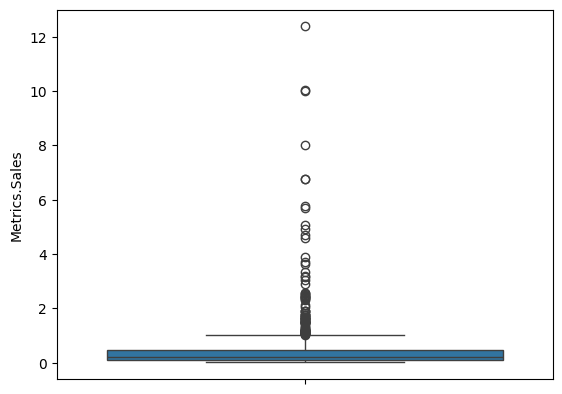

In [26]:
sns.boxplot(df["Metrics.Sales"])

In [46]:
df = df[df["Metrics.Sales"] < 4]
df.shape[0]

843

<Axes: ylabel='Length.All PlayStyles.Average'>

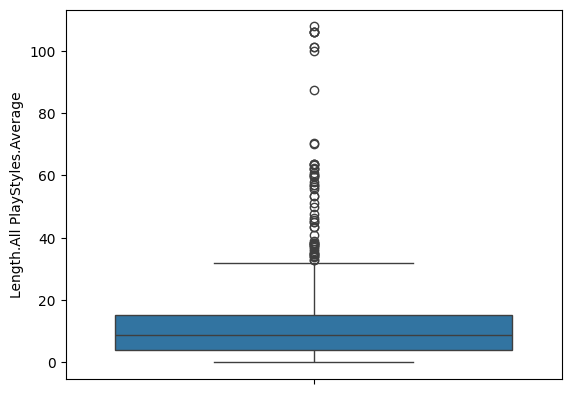

In [28]:
sns.boxplot(df["Length.All PlayStyles.Average"])

In [47]:
df = df[df["Length.All PlayStyles.Average"] < 80]
df.shape[0]

843

## Research Question

How does the Relationship between `Length.All Playstyles.Average` and `Metrics.Sales` Change based on Different Values of `Metadata.Genres` in the Dataset?

### Visualization

Text(0.5, 1.0, 'Average Length of Game vs Sales for different Genres')

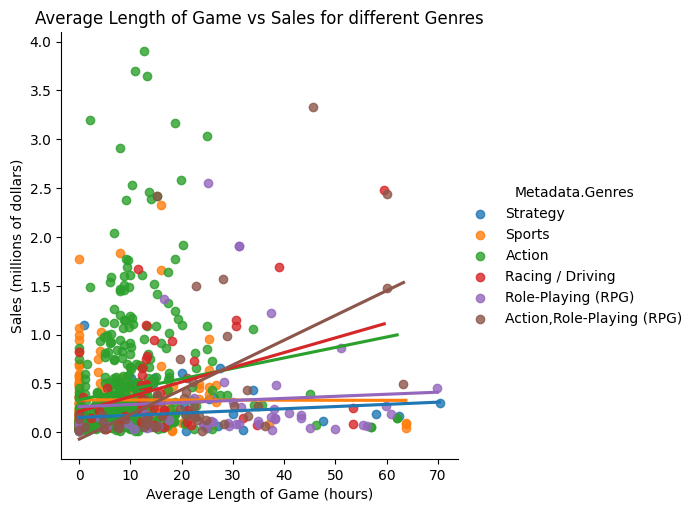

In [37]:
sns.lmplot(x="Length.All PlayStyles.Average",y="Metrics.Sales",hue="Metadata.Genres",data=df,ci=False)
plt.ylabel("Sales (millions of dollars)")
plt.xlabel("Average Length of Game (hours)")
plt.title("Average Length of Game vs Sales for different Genres")

### Summary Statistics

The direction of the relationship between `Length.All PlayStyles` and `Metrics.Sales` is positive for all *genres* except **Sports**. The shape of the relationship between the two variables is consistent for all *genres*; it is linear. The strength of the relationship between the two variables varies considerabily between *genres*. **Action and Role-Playing (RPG)** games and **Racing / Driving** games have moderately strong relationships between the two variables, **Action** games and **Strategy** have a moderately weak relationship between the two variables, and **Role-Playing (RPG)** and **Sports** games have a very weak (non-existent) relationship between the two variables. The number of outliers varies considerably between *genres*. **Strategy** games have very few outliers compared to the other genres. **Action** games by far have the most outliers of any genre. The other 4 genres have about the same number of outliers, about 5-10. The slopes vary between *genres*. **Action and Role-Playing (RPG)** games have the steepest slope. **Action** and **Racing / Driving** games have similar slopes, slightly less steep than **Action and Role-Playing (RPG)** games. The slopes for **Role-Playing (RPG)**, **Sports**, and **Strategy** games are much less steep, they are nearly horizontal.

* The correlation coefficient between length and sales for **Action** games is 0.145
* The correlation coefficient between length and sales for **Action and Role-Playing (RPG)** games is 0.524
* The correlation coefficient between length and sales for **Racing / Driving** games is 0.407
* The correlation coefficient between length and sales for **Role-Playing (RPG)** games is 0.064
* The correlation coefficient between length and sales for **Sports** games is -0.002
* The correlation coefficient between length and sales for **Strategy** games is 0.184

In [41]:
df.groupby("Metadata.Genres").corr(numeric_only=True)

Metrics.Sales  \
Metadata.Genres                                                          
Action                    Metrics.Sales                       1.000000   
                          Length.All PlayStyles.Average       0.145781   
Action,Role-Playing (RPG) Metrics.Sales                       1.000000   
                          Length.All PlayStyles.Average       0.524997   
Racing / Driving          Metrics.Sales                       1.000000   
                          Length.All PlayStyles.Average       0.407929   
Role-Playing (RPG)        Metrics.Sales                       1.000000   
                          Length.All PlayStyles.Average       0.064455   
Sports                    Metrics.Sales                       1.000000   
                          Length.All PlayStyles.Average      -0.002649   
Strategy                  Metrics.Sales                       1.000000   
                          Length.All PlayStyles.Average       0.184008   

                                                         Length.All PlayStyles.Average  
Metadata.Genres                                                                         
Action                    Metrics.Sales                                       0.145781  
                          Length.All PlayStyles.Average                       1.000000  
Action,Role-Playing (RPG) Metrics.Sales                                       0.524997  
                          Length.All PlayStyles.Average                       1.000000  
Racing / Driving          Metrics.Sales                                       0.407929  
                          Length.All PlayStyles.Average                       1.000000  
Role-Playing (RPG)        Metrics.Sales                                       0.064455  
                          Length.All PlayStyles.Average                       1.000000  
Sports                    Metrics.Sales                                      -0.002649  
                          Length.All PlayStyles.Average                       1.000000  
Strategy                  Metrics.Sales                                       0.184008  
                          Length.All PlayStyles.Average                       1.000000

### Research Question Answer

The Relationship between `Length.All Playstyles.Average` and `Metrics.Sales` is seen to change for different values of `Metadata.Genres` in the dataset. On average, increasing the length of the game for games of **Action and Role-Playing (RPG)** and **Racing / Driving** genres leads to a higher amount of sales. On average, increasing the length of the game for games of **Action** and **Strategy** genres sometimes leads to a higher amount of sales. On average, increasing the length of the game for games of **Sports** and **Role-Playing (RPG)** does not lead to a higher amount of sales. For our video game studio creative director, this means that when developing a new game, the genre of the game should be kept in mind when deciding how long to make the game. This can help prevent **Action and Role-Playing (RPG)** and **Racing / Driving** games from flopping because they are too short, ultimately losing the company money. On the flip side, the company can also not waste time and money making **Sports** and **Role-Playing (RPG)** games longer than they need to be.

## 5. Conclusion

To summarize, on average, videogames in this dataset that are **Action and Role-Playing (RPG)** and **Racing / Driving** games see increased sales with increased length of the game, while **Sports** and **Role-Playing (RPG)** games see no increased sales with increased length of the game. A shortcoming of this analysis is that games can belong to more than one genre, but this analysis does consider that (for the most part).
For our video game studio creative director, this means that the relationship between `Length.All Playstyles.Average` and `Metrics.Sales` for, say, a game that is both an **Action** game and a **Strategy** game is unknown; he cannot make an informed decision about how much time and money should be poured into the game (in order to make it longer) for it to be successful. In terms of future work, the analysis should consider the impact on sales by singular genre, and provide insights into how combinations of genres affect sales. This dataset contains all the necessary information to do this since the `Metadata.Genres` column contains a string, within which is a list of genres separated by a comma. This would provide even more specific insights that would be of use to our video game studio creative director.